In [1]:
import  pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

##  Bussiness Problem

Prepare a model for glass classification using KNN

##  Loading Dataset

In [2]:
glass = pd.read_csv('C:/Users/arvin/OneDrive/Desktop/Aditi Datascience/Aditi-ASS(DS)/kNN/glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


The numpy. unique() function finds the unique elements of an array 
and returns these unique elements as a sorted array

In [5]:
np.unique(glass['Type'])    

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [6]:
x=glass.iloc[:,:9]
y=glass.iloc[:,9]

In [7]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.33,random_state=0)
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((143, 9), (143,), (71, 9), (71,))

##  Finding the optimal K value for KNN model by gridsearch method

In [9]:
n_neighbors = np.array(range(1,41))
param_grid = dict(n_neighbors=n_neighbors)

In [10]:
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])})

In [11]:
# Best score and its parameter
print(grid.best_score_)
print(grid.best_params_)

0.7147783251231526
{'n_neighbors': 1}


In [12]:
# KNN model with K = 6

In [13]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [16]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

1    35
2    24
7     6
5     3
3     2
6     1
dtype: int64

In [18]:
pd.crosstab(y_test,preds) #crossstab() function is used to compute a simple cross tabulation of two (or more) factors.

col_0,1,2,3,5,6,7
Type,,,,,,
1,20,4,1,0,0,0
2,7,19,0,1,0,0
3,7,0,1,0,0,0
5,0,0,0,2,0,0
6,0,1,0,0,1,0
7,1,0,0,0,0,6


In [19]:
# We got  accuracy of 69% for our model

In [20]:
np.mean(preds==y_test)

0.6901408450704225

##  Ploting graph of accuracy with the k values we use

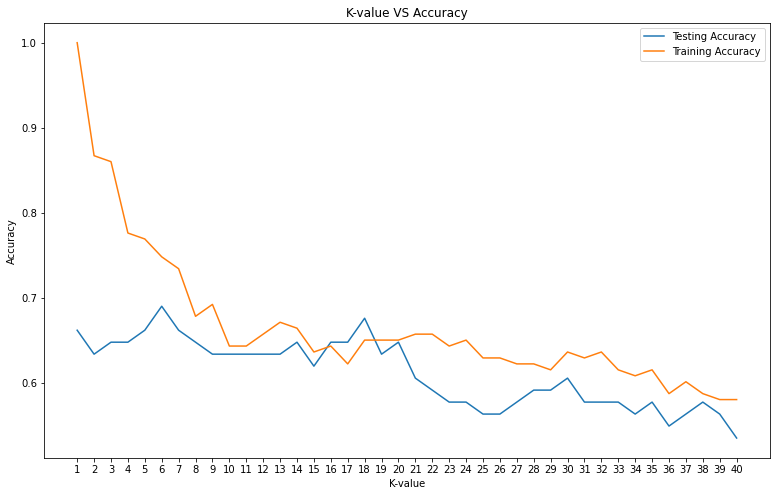

Best accuracy is 0.6901408450704225 with K = 6


In [22]:
import matplotlib.pyplot as plt 
%matplotlib inline
k_values = np.arange(1,41)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

    # Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('K-value VS Accuracy')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.xticks(k_values)

plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

##  EDA

In [23]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [24]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

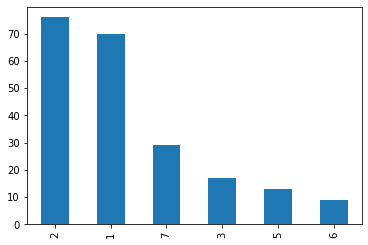

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64


In [25]:
glass['Type'].value_counts(sort=True).plot.bar()
plt.show()
print(glass['Type'].value_counts())


In [26]:
array = glass.values
X=glass.iloc[:,:9]
Y=glass.iloc[:,-1]

In [27]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [28]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

## Grid Search for Algorithm Tuning

Grid search for Entire Dataset

In [29]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
num_folds = 10
kfold = KFold(n_splits=5)

In [31]:
n_neighbors = numpy.array(range(1,50))
param_grid = dict(n_neighbors=n_neighbors)

In [32]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [33]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


## Grid Search for Train Dataset

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
train,test= train_test_split(glass,test_size=0.2,random_state=40)

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [37]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)


In [38]:
model1 = KNeighborsClassifier()
grid1 = GridSearchCV(estimator=model1, param_grid=param_grid)
grid1.fit(X_train, Y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [39]:
print(grid1.best_score_)
print(grid1.best_params_)

0.655798319327731
{'n_neighbors': 8}


In [40]:
print(grid1.best_score_)
print(grid1.best_params_)

0.655798319327731
{'n_neighbors': 8}


In [41]:
KNN_preds1 = grid1.predict(X_train)
pd.crosstab(Y_train,KNN_preds1)

col_0,1,2,3,5,6,7
Type,,,,,,
1,53,6,0,0,0,0
2,13,47,1,0,1,0
3,11,1,2,0,0,0
5,1,3,0,2,0,3
6,3,2,0,0,0,1
7,2,4,0,0,0,15


## Grid Search for Test Dataset

In [45]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [46]:
model2 = KNeighborsClassifier()
grid2 = GridSearchCV(estimator=model2, param_grid=param_grid)
grid2.fit(X_test, Y_test)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [47]:
print(grid2.best_score_)
print(grid2.best_params_)

0.6722222222222223
{'n_neighbors': 1}


## Visualizing the CV results

Text(0, 0.5, 'Cross-Validated Accuracy')

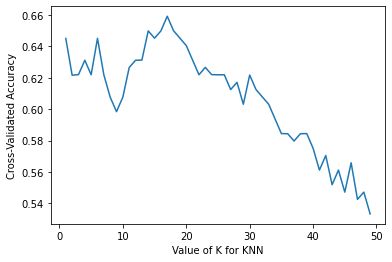

In [48]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 50
k_range = range(1, 50)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=4)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

###  Plot test accuracy and train accuracy

In [49]:
print(train.shape)

(171, 10)


In [50]:
print(test.shape)

(43, 10)


In [51]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [52]:
model2 = KNeighborsClassifier()
grid2 = GridSearchCV(estimator=model2, param_grid=param_grid)
grid2.fit(X_test, Y_test)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [53]:
model2 = KNeighborsClassifier()
grid2 = GridSearchCV(estimator=model2, param_grid=param_grid)
grid2.fit(X_test, Y_test)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [54]:
KNN_results2 = cross_val_score(grid1, X_test, Y_test, cv=kfold)
print(KNN_results2.mean())

0.675


In [55]:
KNN_preds2 = grid1.predict(X_test)
pd.crosstab(Y_test,KNN_preds2)

col_0,1,2,5,7
Type,,,,
1,11,0,0,0
2,6,8,0,0
3,3,0,0,0
5,0,1,2,1
6,1,1,0,1
7,1,0,0,7


In [56]:
accuracy=[]
for i in range(3,50,2):
    neighbour = KNC(n_neighbors=i)
    neighbour.fit(train.iloc[:,:9],train.iloc[:,-1])
    train_acc= np.mean(neighbour.predict(train.iloc[:,:9])==train.iloc[:,-1])
    test_acc= np.mean(neighbour.predict(test.iloc[:,:9])==test.iloc[:,-1])
    accuracy.append([train_acc,test_acc])
print(accuracy)
print(len(accuracy))

[[0.8245614035087719, 0.7674418604651163], [0.7192982456140351, 0.6976744186046512], [0.7134502923976608, 0.6046511627906976], [0.695906432748538, 0.627906976744186], [0.672514619883041, 0.6511627906976745], [0.6549707602339181, 0.627906976744186], [0.6608187134502924, 0.627906976744186], [0.6432748538011696, 0.6511627906976745], [0.6374269005847953, 0.6046511627906976], [0.6491228070175439, 0.5581395348837209], [0.6432748538011696, 0.6046511627906976], [0.6432748538011696, 0.5581395348837209], [0.6374269005847953, 0.5581395348837209], [0.6140350877192983, 0.5348837209302325], [0.631578947368421, 0.5116279069767442], [0.6198830409356725, 0.5116279069767442], [0.6257309941520468, 0.5116279069767442], [0.6198830409356725, 0.5116279069767442], [0.6081871345029239, 0.4883720930232558], [0.6023391812865497, 0.46511627906976744], [0.6023391812865497, 0.4418604651162791], [0.5906432748538012, 0.46511627906976744], [0.5789473684210527, 0.46511627906976744], [0.5847953216374269, 0.4651162790697

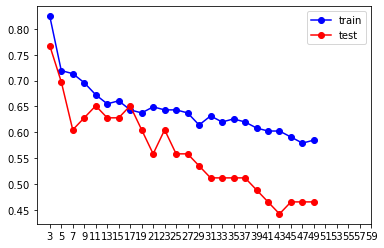

In [57]:
plt.plot(np.arange(3,50,2),[i[0] for i in accuracy],"bo-")
plt.plot(np.arange(3,50,2),[i[1] for i in accuracy],"ro-")
plt.legend(["train","test"])
plt.xticks(np.arange(3,60,2))
plt.show()

In [58]:
# Model for K=3
neighbour=KNC(n_neighbors=3)

In [59]:
neighbour.fit(train.iloc[:,:9],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,:9])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,:9])==test.iloc[:,-1])
print("K=3 : ",train_acc,test_acc)

K=3 :  0.8245614035087719 0.7674418604651163


In [60]:
# Model for K=4
neighbour=KNC(n_neighbors=4)

In [61]:
neighbour.fit(train.iloc[:,:9],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,:9])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,:9])==test.iloc[:,-1])
print("K=4 : ",train_acc,test_acc)

K=4 :  0.7660818713450293 0.6744186046511628


In [62]:
# Model for K=8
neighbour=KNC(n_neighbors=8)

In [63]:
neighbour.fit(train.iloc[:,:9],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,:9])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,:9])==test.iloc[:,-1])
print("K=8 : ",train_acc,test_acc)

K=8 :  0.695906432748538 0.627906976744186


In [64]:
# Model for K=15
neighbour=KNC(n_neighbors=15)

In [65]:
neighbour.fit(train.iloc[:,:9],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,:9])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,:9])==test.iloc[:,-1])
print("K=15 : ",train_acc,test_acc)

K=15 :  0.6608187134502924 0.627906976744186


In [66]:
# Model for K=18
neighbour=KNC(n_neighbors=18)

In [67]:
neighbour.fit(train.iloc[:,:9],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,:9])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,:9])==test.iloc[:,-1])
print("K=18 : ",train_acc,test_acc)

K=18 :  0.6549707602339181 0.627906976744186


###  From all the above results we can see that, For K = 3 the model gives best accuracy